In [ ]:
NAME = "Romaisa Nadeem"
COLLABORATORS = "None"

Titanic Survival Data Analysis using Pandas


For this assignment, we will analyze the open dataset with data on the passengers aboard the Titanic.

The data file for this assignment can be downloaded from Kaggle website: https://www.kaggle.com/c/titanic/data, file `train.csv`. It is also attached to the assignment page. The definition of all variables can be found on the same Kaggle page, in the Data Dictionary section.

Read the data from the file into pandas DataFrame. Analyze, clean and transform the data to answer the following question:

**What categories of passengers were most likely to survive the Titanic disaster?**

**Question 1.**
* The answer to the main question - What categories of passengers were most likely to survive the Titanic disaster? _(2 points)_
* The detailed explanation of the logic of the analysis _(2 points)_

**Answer to the main question:**

- Senior females had the highest survival rate, which a 100% likelihood of surviving the Titanic disaster.

- Females in passenger class 1 had an extremely high survival rate of approximately 97%.

**Detailed Explanation of the Logic of the Analysis:**

The analysis was conducted in the following steps:

- Grouping and aggregation: The analysis used group(by) to calculate the mean survival rate for different categories like Pclass, Sex, AgeGroup, and combinations such as AgeGroup with Sex, and Pclass with Sex.
- Data Visualization: Bar charts were created to visualize the survival rates for better clarity and to identify trends across different passenger categories.

**Key observations:**

- Gender was a signifcant determinant of survival, with females having a much higher survival rate compared to males.

- Passenger class had a major impact; passengers in first class were more likely to survive compared to those in lower classes.

- Age groups showed that passengers of all ages had varied survival rates.

---

**Question 2.**
* What other attributes did you use for the analysis? Explain how you used them and why you decided to use them.
* Provide a complete list of all attributes used.

**Attributes used and their usage explanation:**

- Pclass (Passenger Class): Used to analyze the impact on socio-economic status on survival rates. Included Pclass because it directly correlates with access to resources and safety evacuation.

- Sex: This attribute was essential for analyzing survival differents between males and females. Crucial to confirm the "women and children first" policy and how it impacted surival.

- AgeGroup (Derived from age): Age was segmented into Child, Teen, Young Adult, Adult and Senior groups. I grouped age to better analyze age-related patterns, especially when combined with other attributes like Sex.

- FamilySize (Engineering Feature): Created from the sum of Sibsp (number of siblings/spouses abroad) and Parch(number of parents/children abroad) plus 1 (the individual). I used this attribute to determine if traveling in larger groups or alone affected the likehihood of survival.

- Embarked (Port of Embarkation): Analyzed to see if the port from which passengers boarded influenced survival rates. Different embarkation points could correlate with passenger demographics, which could influence survival outcomes.

**Complete list of all attributes used:**

- Pclass
- Sex
- AgeGroup
- FamilySize
- Embarked

---

**Question 3.**
* Did you engineer any attributes (created new attributes)? If yes, explain the rationale and how the new attributes were used in the analysis?
* If you have excluded any attributes from the analysis, provide an explanation why you believe they can be excluded.

**Engineering attributes and their rationale:**

1. FamilySize
- Rationale: This attribute was engineered by combining SibSp (number of siblings/spouses abroad) and Parch (number of parents/children abroad) with an additional 1 to include the additional 1 to include the individual passenger. This attribute represents the total number of family members each passengers had on board.

- Usage in analysis: The FamilySize attributes was used to assess whether passengers traveling alone, with a small group, or with a large family had different survival probabilities. The logic was the family members might help each other during the emergency, which could have an impact on survival rates.

2. AgeGroup

- Rationale: This attribute was created by segmenting the Age column into categories labeled Child, Teen, Young Adult, and Senior.

- Usage in Analysis: AgeGroup facilitaed the analysis of age-related survival trends. This attribute was particularly valuable when combined with Sex to identify trends such as the survival rates of young females or older males.

**Excluded attributes and reasons for exclusion:**

- Cabin: The cabin attribute had a high percentage of missing values (more than 75% missing). This made it unreliable for analysis as imputing or using it would likely introduce significant bias without adding much value to the findings.

- Ticket: The Ticket attribute contained non-standard alphanummeric values that did not offer meaningul information for survival analysis.

- PassengerId: This attribute is simply an identifier with no analytical value for predicting survival or understanding patterns.

- Name: Contains passenger names that do not directly contribute to passenger survival analysis.

- Fare: The fare attribute was excluded mostly because it correlates with PClass, which was already included as a key variable. Both Fare and Pclass reflect socio-economic status, with higher fare prices corresponding to first-class tickets and lower fares to third-class tickets. Including both attributes would be redundant.


---

**Question 4.**  
* How did you treat missing values for those attributes that you included in the analysis (for example, `age` attribute)? Provide a detailed explanation in the comments.

The missing values were handled carefully:

1. Age
- The missing values in the Age attribute were filled using the median age of the dataset. I particularly chose the median as it is less sensitive to outliers than the mean. This method ensured that the Age distribution remained representative of the original dataset.

2. Embarked
- Missing values in the Embarked column were filled with the mode - the most common value. The mode was used because it reflects the most frequent boarding location, which made it a reasonable assumption for passengers with missing embarked data.

3. Cabin
- The cabin attribute was exclued due to high missing data; more than 75% of the data was missing, making it unreliable for analysis.




In [ ]:
#Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Loading the dataset

data = pd.read_csv("/content/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.shape

(891, 12)

In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
#Checking for missing values

data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#Data cleaning

#Filling missing values for 'Age' with the median
data['Age'] = data['Age'].fillna(data['Age'].median())

#Filling missing values for 'Embarked' with the mode
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

#Dropping 'Cabin' due to high percentage of missing values
data = data.drop(columns=['Cabin'])

In [ ]:
#Checking for missing values after data cleaning

data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#New attributes

#Creating 'FamilySize' by combining 'SibSp' and 'Parch' + 1 (self included)
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [ ]:
# Creating age bins
age_bins = [0, 12, 18, 35, 60, 80]
age_labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

In [ ]:
# Grouping and analyzing survical rates by single attributes

# Survival rate by family size
print("Survival rate by Family Size:")
print(data.groupby('FamilySize')['Survived'].mean(), "\n")

# Survival rate by class
print("Survival rate by Passenger Class:")
print(data.groupby('Pclass')['Survived'].mean(), "\n")

# Survival rate by sex
print("Survival rate by Sex:")
print(data.groupby('Sex')['Survived'].mean(), "\n")

# Survival rate by embarkation point
print("Survival rate by Embarkation Point:")
print(data.groupby('Embarked')['Survived'].mean(), "\n")

# Survival rate by age group
print("Survival rate by Age Group:")
print(data.groupby('AgeGroup')['Survived'].mean(), "\n")


Survival rate by Family Size:
FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64 

Survival rate by Passenger Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64 

Survival rate by Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64 

Survival rate by Embarkation Point:
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64 

Survival rate by Age Group:
AgeGroup
Child          0.579710
Teen           0.428571
Young Adult    0.353271
Adult          0.400000
Senior         0.227273
Name: Survived, dtype: float64 



<ipython-input-12-a497755f9451>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby('AgeGroup')['Survived'].mean(), "\n")


<ipython-input-13-f7df3c4ba334>:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('AgeGroup')['Survived'].mean().plot(kind='bar')


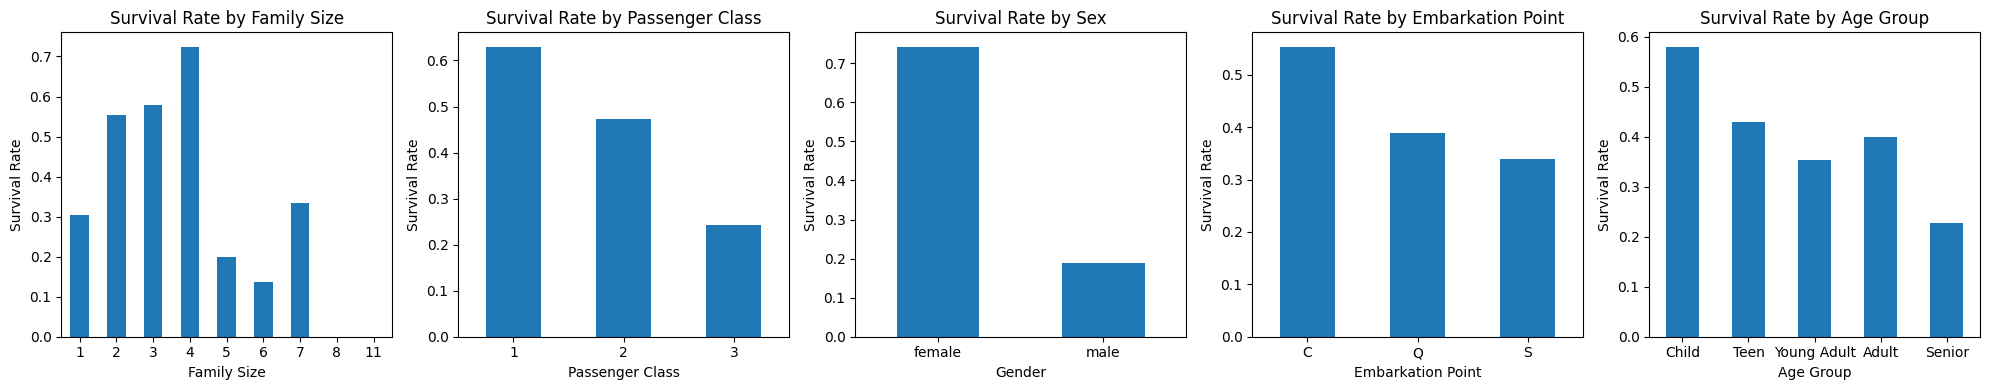

In [ ]:
# Visualizing these single attribute relationships using matplotlib

plt.figure(figsize=(20, 4))

# Survival by family size
plt.subplot(1, 5, 1)
data.groupby('FamilySize')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)

# Survival by class
plt.subplot(1, 5, 2)
data.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)

# Survival by sex
plt.subplot(1, 5, 3)
data.groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Sex')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)

# Survival by embarkation point
plt.subplot(1, 5, 4)
data.groupby('Embarked')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)

# Survival by age group
plt.subplot(1, 5, 5)
data.groupby('AgeGroup')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

- Family size of 4 had the highest survival rate of 0.724138.

- Passengers in the first class had the highest survival rate, while third-class passengers had the lowest.

- Females had a substantically higher survival rate compared to males.

- Passengers who embarked from port C had the highest survival rate.

- Child have the had the highest survival rate of 0.579710.

Survival rate by Age Group and Sex:
Sex            female      male
AgeGroup                       
Child        0.593750  0.567568
Teen         0.750000  0.088235
Young Adult  0.751445  0.162983
Adult        0.771429  0.192000
Senior       1.000000  0.105263 

Survival rate by Passenger Class and Sex:
Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447 



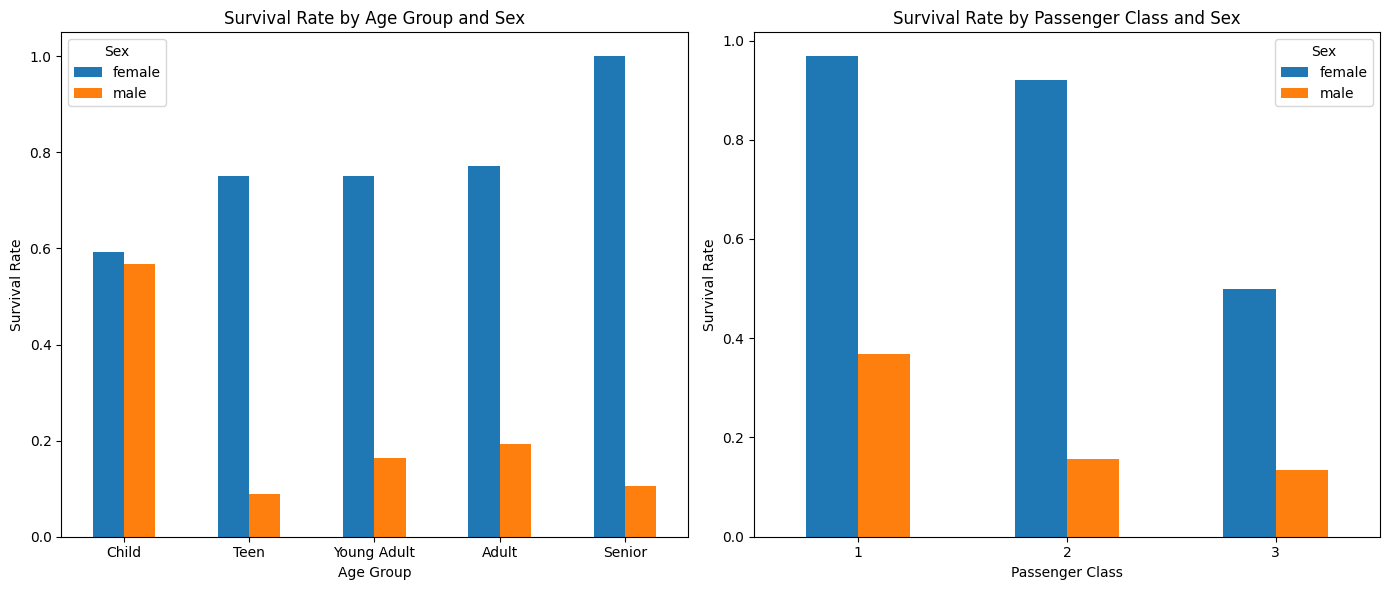

In [ ]:
# Analyzing combinations of categories

# Grouping by AgeGroup and Sex
survival_by_age_sex = data.groupby(['AgeGroup', 'Sex'], observed=True)['Survived'].mean().unstack()

# Grouping by Pclass and Sex
survival_by_class_sex = data.groupby(['Pclass', 'Sex'], observed=True)['Survived'].mean().unstack()

# Display the results
print("Survival rate by Age Group and Sex:")
print(survival_by_age_sex, "\n")

print("Survival rate by Passenger Class and Sex:")
print(survival_by_class_sex, "\n")

# Visualization

# Plotting survival by AgeGroup and Sex
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
survival_by_age_sex.plot(kind='bar', ax=plt.gca())
plt.title('Survival Rate by Age Group and Sex')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.legend(title='Sex')
plt.xticks(rotation=0)

# Plotting survival by Pclass and Sex
plt.subplot(1, 2, 2)
survival_by_class_sex.plot(kind='bar', ax=plt.gca())
plt.title('Survival Rate by Passenger Class and Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.legend(title='Sex')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


- Senior females have the highest suvival rate of 100%.

- Females in passenger class 1 have the highest survival rate of 97%.